# Appendix: Mathematics and Machine Learning

# Sparse Optimization: Theory and Applications 
Sparse optimization is a fundamental paradigm in mathematical modeling that seeks solutions with few non-zero elements, often formalized through ℓ₁-norm regularization or non-convex penalties. This framework is grounded in the **Compressed Sensing (CS)** theory {cite}`Donoho2006CS`, which guarantees exact signal recovery from sub-Nyquist measurements if the signal is sparse in some basis. Key applications include:  

1. **Medical Imaging**: CS enables faster MRI scans by reconstructing images from limited k-space samples (Lustig et al., 2007), as highlighted in the [CUHK lecture notes on CS](http://dsp.ee.cuhk.edu.hk/eleg5481/Lecture%20notes/13-%20compressive%20sensing/cs.pdf) (p. 13).  
2. **Signal Processing**: Sparse methods underpin denoising (e.g., wavelet shrinkage) and inpainting, where total variation minimization preserves edges while removing noise (Figueiredo, 2021, [slides p. 8](https://indico.math.cnrs.fr/event/6637/contributions/5334/attachments/3055/3951/Figueiredo_CIMI-ANITI_Toulouse_2021.pdf)).  
3. **Machine Learning**: Sparse regression (e.g., LASSO; Tibshirani, 1996) and robust PCA (Candès et al., 2011) are critical for feature selection and anomaly detection. The [Ghent tutorial](https://telin.ugent.be/~sanja/Presentation/Tutorial_IMREC_Part1.pdf) (p. 5) further links sparsity to deep network pruning.  
4. **Statistics**: High-dimensional inference (e.g., genomics) benefits from sparsity-induced interpretability (Bühlmann & Van de Geer, 2011).  

The field continues to evolve with **non-convex penalties** (e.g., SCAD) and **greedy algorithms** (OMP), balancing computational efficiency and statistical guarantees. For a unified perspective, see the cited references and tutorials.  

---


## Connection Between Sparse Learning and Functional Analysis

Sparse recovery techniques like **OMP** and **LASSO** are deeply rooted in **functional analysis**, which explains why terms like **Hilbert spaces** and **Banach spaces** frequently appear in machine learning research. These mathematical frameworks provide the theoretical foundation for understanding sparsity-inducing methods.

### Hilbert Spaces and Orthogonal Projections
Hilbert spaces (complete inner product spaces) are essential for analyzing **orthogonal projections** and **basis expansions**. For example:  
- **OMP** iteratively projects the residual onto the span of selected basis vectors, leveraging the **orthogonality principle** to minimize error at each step.  
- The **inner product structure** of Hilbert spaces enables efficient computation of correlations between residuals and dictionary atoms (columns of $ X $).

### Banach Spaces and $ \ell_1 $-Regularization
**LASSO** operates in the context of Banach spaces (complete normed vector spaces) due to its reliance on the $ \ell_1 $-norm:  
- The $ \ell_1 $-norm’s **non-smoothness** at the origin induces sparsity, a property studied in Banach space geometry.  
- Unlike Hilbert spaces, Banach spaces generalize optimization techniques to **non-Euclidean settings**, crucial for sparse regularization.

### Fourier, Wavelet, and Other Representations 
Sparse learning often exploits **transform domains** (e.g., Fourier, wavelet, or learned dictionaries) where signals admit **concise representations**: - These domains provide **structured bases** where only a few coefficients are significant. - The **connection to functional analysis** arises because such bases typically form **frames** or **Riesz bases** in Hilbert spaces, ensuring stable sparse approximations.

## From Fixed Bases to Learned Representations
1. **Classical Sparse Coding**:  
   - Relies on **predefined bases** (e.g., Fourier, wavelets) where signals admit sparse representations.  
   - These bases often form **frames** or **Riesz bases** in Hilbert spaces, ensuring stable approximations.  

2. **Convolutional Neural Networks (CNNs)**:  
   - Learn **adaptive bases/filters** from data, implicitly constructing sparse-like representations through:  
     - **Local connectivity**: Filters act as localized basis functions.  
     - **Activation sparsity**: ReLU promotes de facto sparsity in feature maps.  
   - While CNNs lack explicit $ \ell_0 $/$ \ell_1 $ constraints, their hierarchical structure approximates **multi-scale sparse decompositions**, akin to wavelet analysis but data-driven.  

### The Evolving Role of Sparse Methods
While deep learning has reduced reliance on *handcrafted* sparse models in some domains, sparse methods remain relevant because:  

1. **Interpretability**:  
   - OMP/LASSO yield **explicit basis selections**, whereas CNNs operate as black boxes.  
   - Critical in fields like medicine or physics where model transparency is required.  

2. **Data-Efficiency**:  
   - Sparse methods often outperform DL in **low-data regimes** (e.g., medical imaging with small datasets).  

3. **Theoretical Guarantees**:  
   - Compressed sensing (**OMP**) and convex optimization (**LASSO**) provide **recovery guarantees** under precise conditions, unlike empirical DL results.  

4. **Hybrid Approaches**:  
   - Modern architectures (e.g., **ISTA-Net**, **Learned Iterative Shrinkage**) blend sparse priors with deep learning, showing that sparsity remains a useful *inductive bias*.  

 
Sparse learning and deep learning are complementary:  
- **CNNs** dominate when data is abundant and interpretability is secondary.  
- **OMP/LASSO** persist in scenarios requiring rigor, efficiency, or transparency.  
- **Functional analysis** bridges these paradigms, providing tools to analyze both fixed and learned representations.  




---

## MRI reconstruction

MRI reconstruction can be formulated as an inverse problem where the goal is to recover the original image $ \mathbf{m} $ from under-sampled k-space measurements $ \mathbf{y} $. This is achieved using sparse optimization techniques.

A common formulation for MRI reconstruction is:

$$
\min_{\mathbf{m}} \|\mathbf{F}_u \mathbf{m} - \mathbf{y}\|_2^2 + \lambda \|\Psi \mathbf{m}\|_p
$$

where:
- $ \mathbf{m} $ represents the MRI image to be reconstructed.
- $ \mathbf{F}_u $ is the **under-sampled Fourier operator**, mapping the image to k-space.
- $ \mathbf{y} $ is the **acquired k-space data** (limited measurements).
- $ \Psi $ is the **sparsifying transform** (e.g., wavelet or total variation).
- $ \|\Psi \mathbf{m}\|_p $ represents the **sparsity constraint**, often chosen as $ \ell_1 $ (similar to LASSO) or $ \ell_0 $ (similar to OMP).
- $ \lambda $ controls the balance between data fidelity and sparsity enforcement.

By leveraging sparsity, MRI reconstruction enables faster scans with fewer measurements while preserving essential anatomical details.


## PyTomography

**PyTomography** is an open-source Python library designed for **medical image reconstruction**, particularly in **SPECT (Single-Photon Emission Computed Tomography)** and **PET (Positron Emission Tomography)** imaging. Developed to address the challenges of **quantitative tomographic reconstruction**, PyTomography provides a **flexible, modular framework** for implementing advanced reconstruction algorithms, including **attenuation correction, scatter correction, and resolution modeling**.  

### **Key Features**  
✅ **Open-source & community-driven** ([GitHub](https://github.com/PyTomography/PyTomography))  
✅ **Supports multiple reconstruction techniques** (OSEM, MLEM, deep learning-based methods)  
✅ **Integrates with GPU acceleration** for faster computations  
✅ **Well-documented** with tutorials and API references ([ReadTheDocs](https://pytomography.readthedocs.io/en/latest/))  
✅ **Validated in peer-reviewed research** ([Scientific Reports, 2024](https://www.sciencedirect.com/science/article/pii/S235271102400390X))  

### **Why Use PyTomography?**  
PyTomography bridges the gap between **research and clinical applications** by offering:  
- **Reproducible** reconstruction workflows  
- **Customizable** forward and backward projection models  
- **Seamless integration** with Python’s scientific computing stack (NumPy, PyTorch)  

Whether for **academic research, algorithm development, or clinical prototyping**, PyTomography provides a **powerful, accessible toolkit** for next-generation medical imaging reconstruction. 

## PySAP

The **Python Sparse data Analysis Package (PySAP)** was developed as part of COSMIC, a multi-disciplinary collaboration between **NeuroSpin**, experts in biomedical imaging, and **CosmoStat**, experts in astrophysical image processing. PySAP is designed to provide state-of-the-art signal processing tools for various imaging domains, including:

- **Astronomy**
- **Electron Tomography**
- **Magnetic Resonance Imaging (MRI)**

One of PySAP’s core contributions lies in **sparse optimization**, a powerful technique widely used for reconstructing images from incomplete or noisy data. The package implements advanced **compressed sensing algorithms**{cite}`theodoridis2020machine`, allowing efficient image restoration while preserving essential features.

In medical imaging, PySAP plays a crucial role in MRI reconstruction by leveraging **sparsity-based approaches** to improve scan efficiency. It enables:

- Reduced scanning time while maintaining image quality
- Improved reconstruction of under-sampled k-space data
- Integration of machine learning techniques for further enhancement

The first release of PySAP was presented in Farrens et al. {cite}`gueddari2020PySAP` and continues to evolve as a robust tool for sparse signal processing.

For further exploration, visit the [PySAP GitHub repository](https://github.com/CEA-COSMIC/pysap).

In [deep learning course](http://fum-cs.github.io/dl), we will encounter additional examples of minimizing $ ||Ax - b|| $, including applications like image deblurring and super-resolution.


![](img/Rank-Based-Methods.jpg)

For valuable references on Ridge and Shrinkage methods, consider consulting Prof. Arashi's books {cite}`saleh2019theory,saleh2022rank`.

---


## Fourier series expansion of a square wave

$$
\boxed{
f(t) = \frac{4}{\pi} \sum_{n=1}^{\infty} \frac{\sin\big((2n-1) \cdot 2\pi ft\big)}{2n-1}
}
$$

| Component       | Formula                          | Code Implementation             | Purpose                                                                 |
|-----------------|----------------------------------|----------------------------------|-------------------------------------------------------------------------|
| **Odd Harmonics** | \((2n-1)\)                       | `frequency = 2 * n - 1`         | Square waves require only odd harmonics (1f, 3f, 5f, ...).             |
| **Amplitude**   | \(\frac{4}{\pi (2n-1)}\)         | `4 / (np.pi * frequency)`       | Ensures higher harmonics contribute less (weighted by \(1/n\)).        |
| **Sine Wave**   | \(\sin(2\pi (2n-1) t)\)          | `np.sin(2 * np.pi * frequency * x)` | Generates the sine wave at the harmonic frequency.                     |



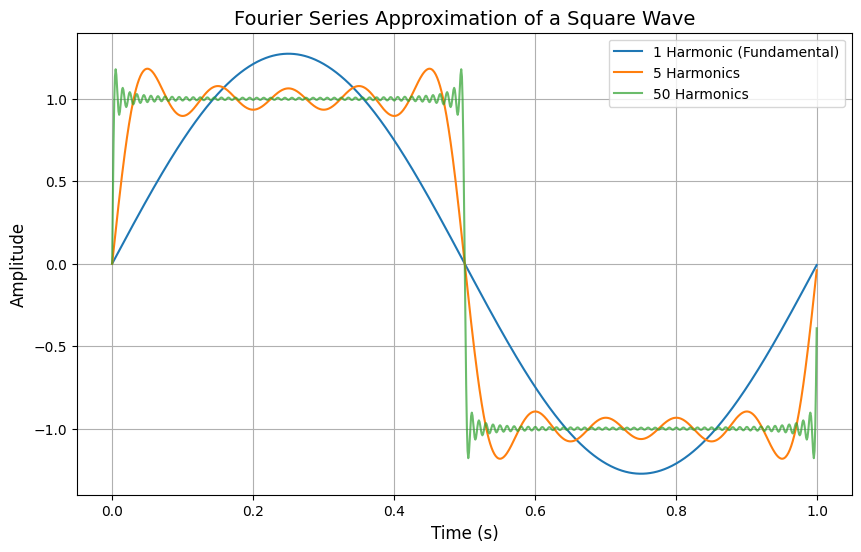

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(x, harmonics=5):
    """
    Generate a square wave using Fourier series (sum of sine waves).
    Parameters:
        x: Time points
        harmonics: Number of sine waves to sum
    Returns:
        Square wave approximation
    """
    y = np.zeros_like(x)
    for n in range(1, harmonics + 1):
        # Fourier series for square wave: (4/π) * Σ [sin(2π(2n-1)*ωt)/(2n-1)]
        frequency = 2 * n - 1  # Odd harmonics only
        amplitude = 4 / (np.pi * frequency)
        y += amplitude * np.sin(2 * np.pi * frequency * x)
    return y

# Time points (0 to 1 second, 1000 samples)
t = np.linspace(0, 1, 1000, endpoint=False)

# Create square wave approximations with different numbers of harmonics
square_1 = square_wave(t, harmonics=1)  # Only 1 sine wave
square_5 = square_wave(t, harmonics=5)  # 5 sine waves
square_50 = square_wave(t, harmonics=50)  # 50 sine waves

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, square_1, label="1 Harmonic (Fundamental)")
plt.plot(t, square_5, label="5 Harmonics")
plt.plot(t, square_50, label="50 Harmonics", alpha=0.7)
plt.title("Fourier Series Approximation of a Square Wave", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Fourier Series for Signal Compression

A signal sampled at 1000 points in the interval $[0, 2\pi]$ can be approximated using a truncated Fourier series:

$$
f(t) \approx \frac{a_0}{2} + \sum_{n=1}^{N} \left[a_n \cos(n\omega_0 t) + b_n \sin(n\omega_0 t)\right]
$$

where just 6 coefficients ($a_0, a_1, b_1, a_2, b_2, a_3$) can capture essential features.

### Fourier Series
For a periodic function $f(t)$ with period $T$:

$$
f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right)\right]
$$

### Coefficients
$$
\begin{aligned}
a_n &= \frac{2}{T}\int_{0}^{T} f(t)\cos\left(\frac{2\pi n t}{T}\right) dt \\
b_n &= \frac{2}{T}\int_{0}^{T} f(t)\sin\left(\frac{2\pi n t}{T}\right) dt
\end{aligned}
$$

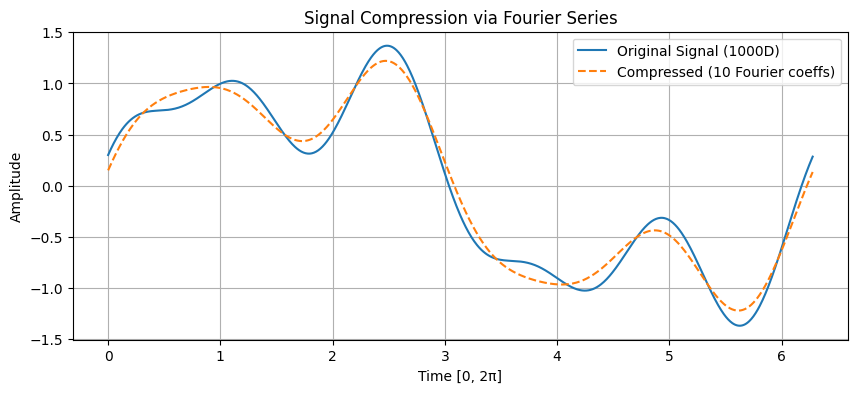

Original dimension: 1000
Compressed representation dimension: 10


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Generate original signal (1000 samples)
N = 1000
t = np.linspace(0, 2*np.pi, N, endpoint=False)
signal = np.sin(t) + 0.5*np.sin(3*t) + 0.3*np.cos(5*t)  # Example signal

# Compute Fourier coefficients
fft_coeffs = fft(signal)
num_coeffs = 10  # Keep only 10 coefficients (DC + 5 harmonics)

# Zero out high-frequency components
compressed_fft = np.zeros_like(fft_coeffs, dtype=complex)
compressed_fft[:num_coeffs//2] = fft_coeffs[:num_coeffs//2]
compressed_fft[-num_coeffs//2:] = fft_coeffs[-num_coeffs//2:]

# Reconstruct signal from compressed coefficients
compressed_signal = np.fft.ifft(compressed_fft).real

# Plot comparison
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Original Signal (1000D)")
plt.plot(t, compressed_signal, '--', label=f"Compressed ({num_coeffs} Fourier coeffs)")
plt.title("Signal Compression via Fourier Series")
plt.xlabel("Time [0, 2π]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

print("Original dimension:", N)
print("Compressed representation dimension:", num_coeffs)



## Python Implementation
```python
import numpy as np
from scipy.fft import fft, ifft

def fourier_compress(signal, num_coeffs):
    """Compress signal using Fourier coefficients"""
    fft_coeffs = fft(signal)
    compressed = np.zeros_like(fft_coeffs, dtype=complex)
    compressed[:num_coeffs//2] = fft_coeffs[:num_coeffs//2]
    compressed[-num_coeffs//2:] = fft_coeffs[-num_coeffs//2:]
    return ifft(compressed).real
```

## Key Equations in Compression

1. **Nyquist-Shannon Sampling**:
   $$
   f_s \geq 2f_{\text{max}}
   $$

2. **Compression Ratio**:
   $$
   R = \frac{N_{\text{original}}}{N_{\text{coeffs}}}
   $$

3. **Reconstruction Error**:
   $$
   \epsilon = \|f - \hat{f}\|_2
   $$

## Example Calculation
For a signal with 1000 points ($N=1000$) compressed to 6 coefficients:

$$
R = \frac{1000}{6} \approx 166.67
$$

The relative error is bounded by:
$$
\frac{\epsilon}{\|f\|_2} \leq \sum_{n=N+1}^{\infty} (|a_n| + |b_n|)
$$
